In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 경고문구 무시
import warnings
warnings.filterwarnings('ignore')

# 이미지 해상도 높이기 
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
daf = pd.read_csv('완료.csv',encoding='cp949')

In [4]:
daf.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [5]:
daf

,판매일,구분,판매수량,옵션코드,입수,상품명,일일 확진자 수,식료품(소비물가지수),음료(소비물가지수),소비자심리지수,개강여부
0,2021-01-04,매출,1,BX,40,오뚜기]진라면매운멀티<120g>,1020.0,103.00,100.04,95.4,0.0
1,2021-01-04,매출,1,BX,40,농심]너구리 얼큰멀티<40>,1020.0,103.00,100.04,95.4,0.0
2,2021-01-04,매출,1,BX,40,농심]신라면 멀티<40>,1020.0,103.00,100.04,95.4,0.0
3,2021-01-04,매출,1,BX,40,농심]짜파게티 멀티<40>,1020.0,103.00,100.04,95.4,0.0
4,2021-01-04,매출,1,BX,30,레쓰비<175ml*30>,1020.0,103.00,100.04,95.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...
22019,2022-07-01,매출,10,CS,6,가야산천년수<2L*6>,9516.0,113.26,109.87,86.3,0.0
22020,2022-07-01,매출,2,BX,40,오뚜기]진라면매운멀티<120g>,9516.0,113.26,109.87,86.3,0.0
22021,2022-07-01,매출,8,CS,6,가야산천년수<2L*6>,9516.0,113.26,109.87,86.3,0.0
22022,2022-07-01,매출,12,EA,1,코카콜라<1.5*12>,9516.0,113.26,109.87,86.3,0.0


In [6]:
# !pip install openpyxl

In [7]:
df = pd.read_csv('판매와강수량병합데이터.csv',encoding='cp949')
pd.options.display.float_format = '{:.0f}'.format
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df

,판매일,구분,우편번호,판매수량,옵션코드,규격,입수,상품 바코드,상품명,지점,강수량(mm)
0,2021-01-04,매출,37542,4,EA,100g*1,1,8801007266435,다시다)쇠골드명품100g,전국,0
1,2021-01-04,매출,37542,2,BX,12입,12,18801039202378,사조]해표식용유<1.8L>,전국,0
2,2021-01-04,매출,37542,1,EA,1입,1,8809198673605,젓가락]키친센스 나무<250p>,전국,0
3,2021-01-04,매출,37542,1,EA,50g*16*1,1,8801077334102,소세지 천하장사800g,전국,0
4,2021-01-04,매출,37542,3,EA,10입,1,8801045375045,오뚜기]옛날자른당면<1kg >,전국,0
...,...,...,...,...,...,...,...,...,...,...,...
519469,2022-06-30,반품,37733,1,BX,500ml*24,24,18801223100268,맥콜 <500ml*24>,전국,36
519470,2022-06-30,반품,37782,1,EA,5L*1,1,8809384555005,음식물쓰레기통 5L,전국,36
519471,2022-06-30,반품,37826,1,BX,1.5*6,6,58801056088199,델몬트오렌지1.5,전국,36
519472,2022-06-30,반품,37931,1,CS,1입,1,8809208795143,선풍기]대원14인치 좌석용 DW-EF1420,전국,36


In [8]:
df.columns

Index(['판매일', '구분', '우편번호', '판매수량', '옵션코드', '규격', '입수', '상품 바코드', '상품명', '지점',
       '강수량(mm)'],
      dtype='object')

In [9]:
df.loc[df['구분']=='반품','판매수량'] = -df.loc[df['구분']=='반품','판매수량'] 

df.drop('구분',axis=1,inplace=True)

In [10]:
df.drop(columns=['우편번호', '옵션코드', '규격', '입수', '상품 바코드', '지점'],axis=1,inplace=True)

### 라면들
'신라면|안성탕면|진라면|너구리|열라면|팔도비빔면|참깨라면|틈새라면|삼양라면|짜파게티|진짬뽕|불닭볶음면|사발면|왕뚜껑|오동통면|스낵면'

### 물
'삼다수|백산수|스파클|몽베스트|아이시스|동원샘물|에비앙|지리산수|풀무원샘물|평창수|지리산맑은샘|천년수'

### 캔커피
'칸타타|티오피|조지아|레쓰비|프렌치카페|스타벅스|산타페'

### 에너지드링크
'구론산|비타500|박카스F|오로나민씨|비타민D|몬스터에너지캔|핫식스캔|레드불캔|에너지드링크'

### 탄산음료
'칠성사이다|코카콜라|펩시|나랑드사이다|천연사이다|킨사이다|환타|스프라이트|밀키스|마운틴듀'

In [11]:
# df = df.loc[df['상품명'].str.contains('''신라면|안성탕면|진라면|너구리|열라면|팔도비빔면|참깨라면|틈새라면|삼양라면|짜파게티|진짬뽕|불닭볶음면|사발면|왕뚜껑|오동통면|스낵면|삼다수|백산수|스파클|몽베스트|아이시스|동원샘물|에비앙|지리산수|풀무원샘물|평창수|지리산맑은샘|천년수|칸타타|티오피|조지아|레쓰비|프렌치카페|스타벅스|산타페|구론산|비타500|박카스F|오로나민씨|비타민D|몬스터에너지캔|핫식스캔|레드불캔|에너지드링크|칠성사이다|코카콜라|펩시|나랑드사이다|천연사이다|킨사이다|환타|스프라이트|밀키스|마운틴듀'''),:]

In [12]:
# df.loc[df['상품명'].str.contains('천년수'),:]

In [13]:
df['종류'] = '-'

df.loc[df['상품명'].str.contains('신라면|안성탕면|진라면|너구리|열라면|팔도비빔면|참깨라면|틈새라면|삼양라면|짜파게티|진짬뽕|불닭볶음면|사발면|왕뚜껑|오동통면|스낵면'),'종류'] = '라면'
df.loc[df['상품명'].str.contains('삼다수|백산수|스파클|몽베스트|아이시스|동원샘물|에비앙|지리산수|풀무원샘물|평창수|지리산맑은샘|천년수'),'종류'] = '생수'
df.loc[df['상품명'].str.contains('칸타타|티오피|조지아|레쓰비|프렌치카페|스타벅스|산타페'),'종류'] = '캔커피'
df.loc[df['상품명'].str.contains('칠성사이다|코카콜라|펩시|나랑드사이다|천연사이다|킨사이다|환타|스프라이트|밀키스|마운틴듀'),'종류'] = '탄산음료'
df.loc[df['상품명'].str.contains('구론산|비타500|박카스F|오로나민씨|비타민D|몬스터에너지캔|핫식스캔|레드불캔|에너지드링크'),'종류'] = '에너지드링크'

In [14]:
df.isna().sum()

판매일        0
판매수량       0
상품명        0
강수량(mm)    0
종류         0
dtype: int64

In [15]:
df.loc[df['상품명'].str.contains('가야산천년수<2L*6>'),:]

,판매일,판매수량,상품명,강수량(mm),종류


In [16]:
df

,판매일,판매수량,상품명,강수량(mm),종류
0,2021-01-04,4,다시다)쇠골드명품100g,0,-
1,2021-01-04,2,사조]해표식용유<1.8L>,0,-
2,2021-01-04,1,젓가락]키친센스 나무<250p>,0,-
3,2021-01-04,1,소세지 천하장사800g,0,-
4,2021-01-04,3,오뚜기]옛날자른당면<1kg >,0,-
...,...,...,...,...,...
519469,2022-06-30,-1,맥콜 <500ml*24>,36,-
519470,2022-06-30,-1,음식물쓰레기통 5L,36,-
519471,2022-06-30,-1,델몬트오렌지1.5,36,-
519472,2022-06-30,-1,선풍기]대원14인치 좌석용 DW-EF1420,36,-


In [17]:
covid = pd.read_csv('covid2.csv',encoding='cp949')

In [18]:
covid.drop(columns='Unnamed: 0',inplace=True)

In [19]:
covid['판매일'] = pd.to_datetime(covid.판매일)

In [20]:
df['판매일'] = pd.to_datetime(df.판매일)

In [21]:
df = pd.merge(df,covid,how='left',on='판매일')

In [22]:
df =  df.interpolate(df='time')

In [23]:
df.isna().sum()

판매일         0
판매수량        0
상품명         0
강수량(mm)     0
종류          0
확진자 수       0
일일 확진자 수    0
dtype: int64

In [1]:
df

NameError: name 'df' is not defined

In [ ]:
df.loc[df['상품명'].str.contains('천년수'),:]

In [ ]:
df.loc[df['상품명'].str.contains('짜파'),:]

In [ ]:
date = df['판매일'].unique()
item = df['상품명'].unique()

In [ ]:
df['판매일'] = pd.to_datetime(df['판매일'])

In [ ]:
df['일일 확진자 수'] = 0

In [ ]:
df.loc[df['판매일'] == date[1],:]['확진자 수'].mean()

In [ ]:
for i in range(0,len(date)):
    df.loc[df['판매일'] == date[i], '일일 확진자 수'] = df.loc[df['판매일'] == date[i], :]['확진자 수'].mean() - df.loc[df['판매일'] == date[i-1],:]['확진자 수'].mean()

In [ ]:
df.loc[df['판매일'] == date[0], '일일 확진자 수'] = 1020

In [ ]:
df

In [ ]:
df['월주차'] = '-'

for x in range(0,96506):
    df['월주차'][x] = str(df['판매일'][x].isocalendar()[0]) + '-' + str(df['판매일'][x].isocalendar()[1])

In [ ]:
df

In [ ]:
date = df['판매일'].unique()
item = df['상품명'].unique()

for i in date:
    for j in range(0,len(item)):
        df.loc[(df['판매일'] == i) & (df['상품명'] == item[j]) ,['판매수량']] = int(df.loc[(df['판매일'] == i) & (df['상품명'] == item[j]) ,['판매수량']].sum())

df1 = df.copy()

df1.drop_duplicates(inplace=True)

df1

In [ ]:
df1.loc[df['상품명'].str.contains('레쓰비<175ml*30>'),:]

In [ ]:
# df1.to_csv('0829.csv') 

# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [177]:
# df1.to_csv('순수구매 계산 완료.csv')

In [278]:
# df1.to_csv('0828.csv')

In [230]:
# df1.reset_index(drop=True,inplace=True)

# df1['월주차'] = '-'

# for x in range(0,34703):
#     df1['월주차'][x] = str(df1['판매일'][x].isocalendar()[0]) + '-' + str(df1['판매일'][x].isocalendar()[1])

In [253]:
# df1.groupby('월주차')

,판매일,판매수량,상품명,강수량(mm),종류,확진자 수,일일 확진자 수,월주차
0,2021-01-04,34,신라면 컵 6入 XX,0,라면,64264,1020,2021-1
1,2021-01-04,20,농심]안성탕면 컵 6入,0,라면,64264,1020,2021-1
2,2021-01-04,5,롯데]칠성사이다(병) <340ml*24>,0,탄산음료,64264,1020,2021-1
3,2021-01-04,3,오뚜기]진라면매운멀티<120g>,0,라면,64264,1020,2021-1
4,2021-01-04,7,농심]너구리 얼큰멀티<40>,0,라면,64264,1020,2021-1
...,...,...,...,...,...,...,...,...
34698,2022-06-30,1,남양]프렌치카페믹스<50T>,36,캔커피,18359341,9585,2022-26
34699,2022-06-30,1,동서]스타벅스모카<281g>,36,캔커피,18359341,9585,2022-26
34700,2022-06-30,1,농심]신라면 컵<30>,36,라면,18359341,9585,2022-26
34701,2022-06-30,5,팔도]왕뚜껑소컵<65*6>,36,라면,18359341,9585,2022-26


In [276]:
df1 = pd.read_csv('0828.csv')

,판매일,판매수량,상품명,강수량(mm),종류,확진자 수,일일 확진자 수,월주차
0,2021-01-04,34,신라면 컵 6入 XX,0,라면,64264,1020,2021-1
1,2021-01-04,20,농심]안성탕면 컵 6入,0,라면,64264,1020,2021-1
2,2021-01-04,5,롯데]칠성사이다(병) <340ml*24>,0,탄산음료,64264,1020,2021-1
3,2021-01-04,3,오뚜기]진라면매운멀티<120g>,0,라면,64264,1020,2021-1
4,2021-01-04,7,농심]너구리 얼큰멀티<40>,0,라면,64264,1020,2021-1
...,...,...,...,...,...,...,...,...
34698,2022-06-30,1,남양]프렌치카페믹스<50T>,36,캔커피,18359341,9585,2022-26
34699,2022-06-30,1,동서]스타벅스모카<281g>,36,캔커피,18359341,9585,2022-26
34700,2022-06-30,1,농심]신라면 컵<30>,36,라면,18359341,9585,2022-26
34701,2022-06-30,5,팔도]왕뚜껑소컵<65*6>,36,라면,18359341,9585,2022-26


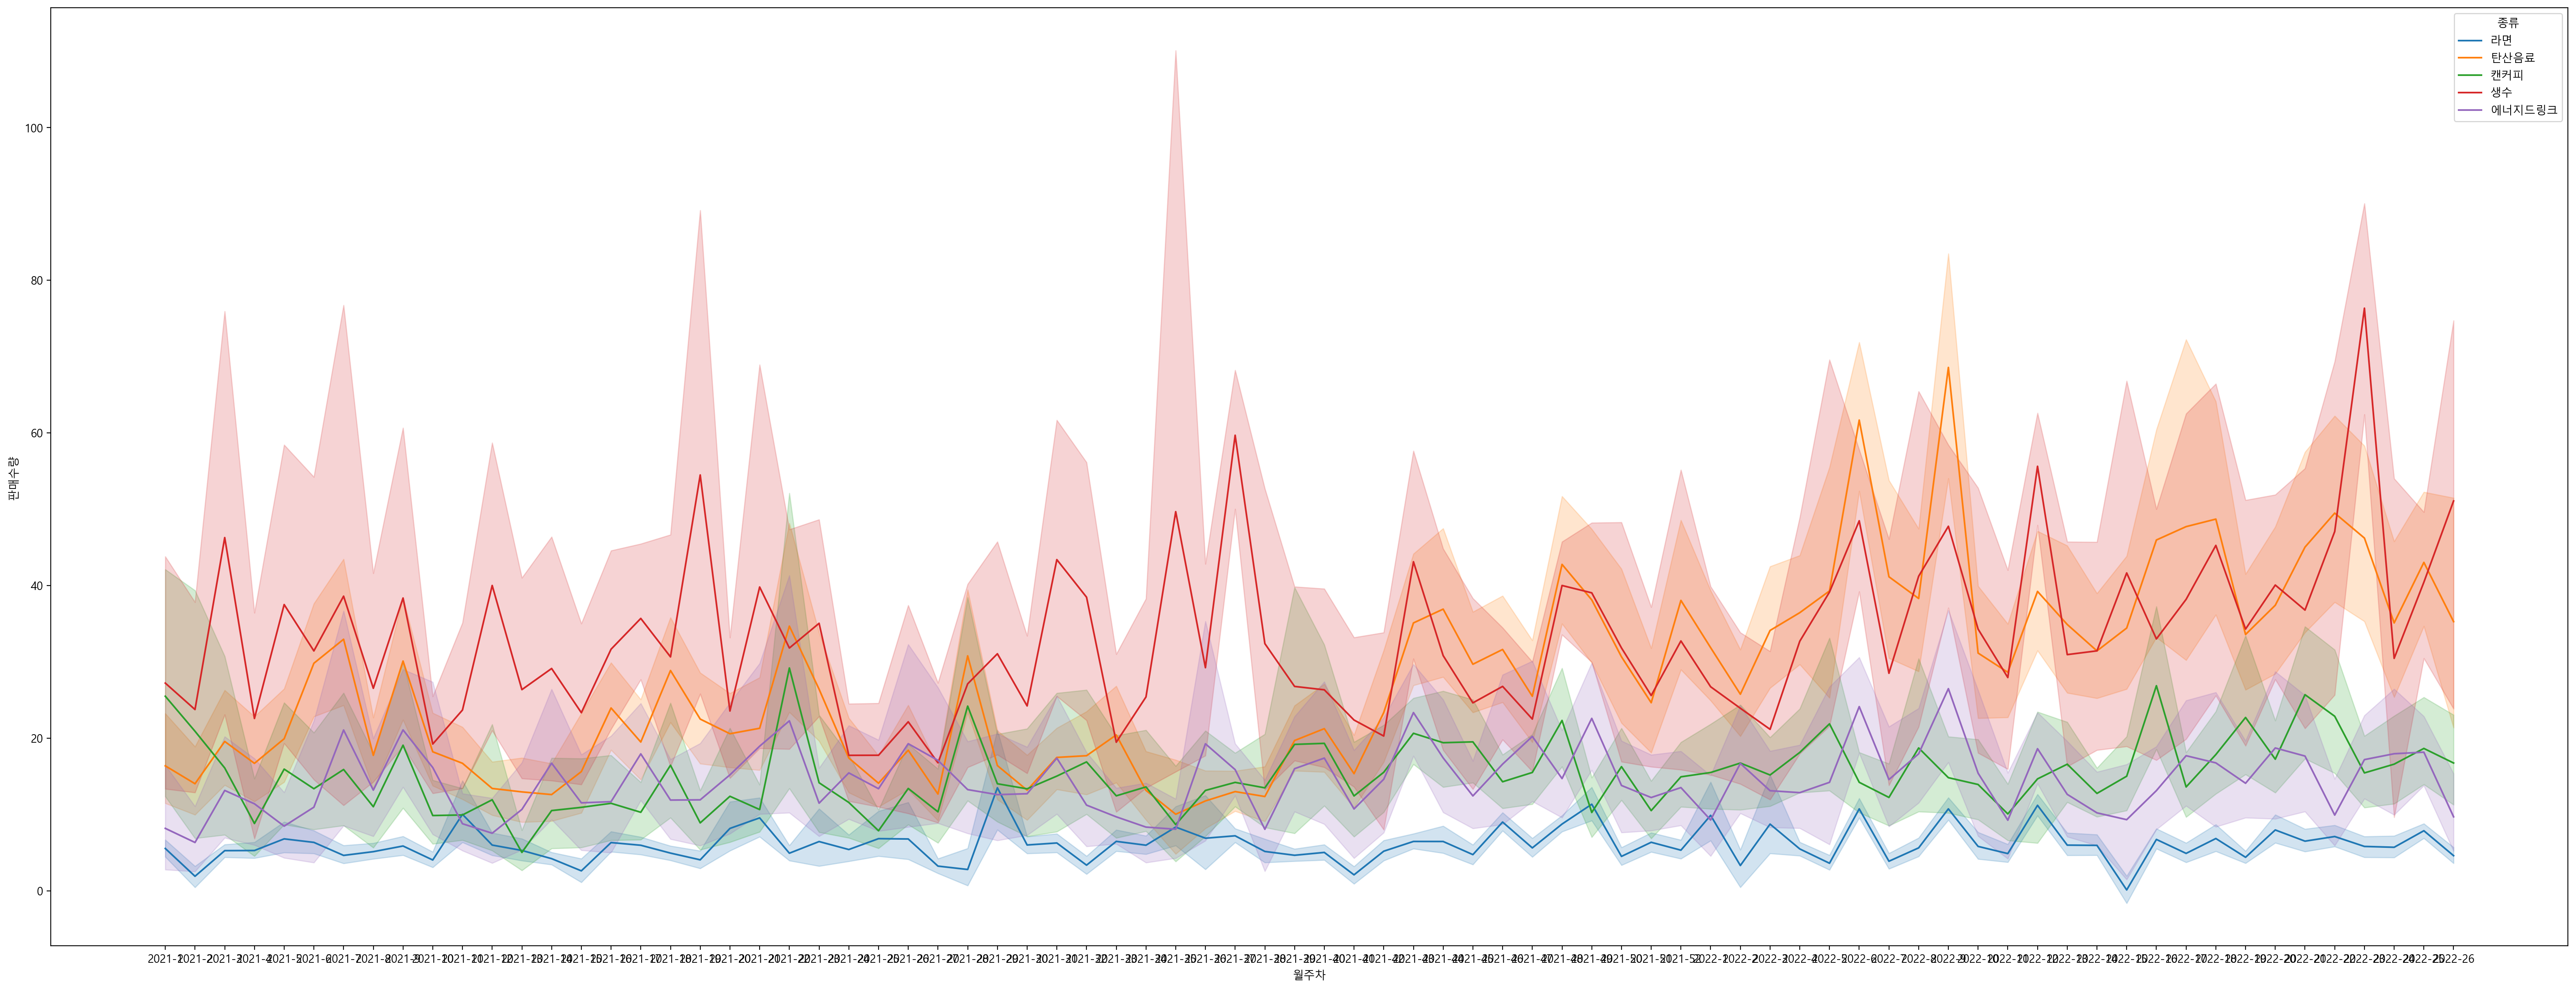

In [266]:
plt.figure(figsize=(40,15))
sns.lineplot(x = '월주차',y = '판매수량',hue='종류',data = df1)
plt.show()

In [358]:
fin = pd.read_csv('df.csv',encoding='cp949')

In [359]:
fin.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [360]:
fin['확진자 수'] = df1['확진자 수']

In [361]:
date

<DatetimeArray>
['2021-01-04 00:00:00', '2021-01-05 00:00:00', '2021-01-06 00:00:00',
 '2021-01-07 00:00:00', '2021-01-08 00:00:00', '2021-01-11 00:00:00',
 '2021-01-12 00:00:00', '2021-01-13 00:00:00', '2021-01-14 00:00:00',
 '2021-01-15 00:00:00',
 ...
 '2022-06-17 00:00:00', '2022-06-20 00:00:00', '2022-06-21 00:00:00',
 '2022-06-22 00:00:00', '2022-06-23 00:00:00', '2022-06-24 00:00:00',
 '2022-06-27 00:00:00', '2022-06-28 00:00:00', '2022-06-29 00:00:00',
 '2022-06-30 00:00:00']
Length: 379, dtype: datetime64[ns]

In [362]:
fin['판매일'] = pd.to_datetime(fin['판매일'])

In [363]:
fin['일일 확진자 수'] = 0

In [364]:
fin

,판매일,판매수량,상품명,강수량(mm),종류,일일 확진자 수,식료품(소비물가지수),음료(소비물가지수),소비자심리지수,개강여부,확진자 수
0,2021-01-04,34,신라면 컵 6入 XX,0,라면,0,103,100,95,0,64264
1,2021-01-04,20,농심]안성탕면 컵 6入,0,라면,0,103,100,95,0,64264
2,2021-01-04,5,롯데]칠성사이다(병) <340ml*24>,0,탄산음료,0,103,100,95,0,64264
3,2021-01-04,3,오뚜기]진라면매운멀티<120g>,0,라면,0,103,100,95,0,64264
4,2021-01-04,7,농심]너구리 얼큰멀티<40>,0,라면,0,103,100,95,0,64264
...,...,...,...,...,...,...,...,...,...,...,...
34698,2022-06-30,1,남양]프렌치카페믹스<50T>,36,캔커피,0,111,110,97,0,18359341
34699,2022-06-30,1,동서]스타벅스모카<281g>,36,캔커피,0,111,110,97,0,18359341
34700,2022-06-30,1,농심]신라면 컵<30>,36,라면,0,111,110,97,0,18359341
34701,2022-06-30,5,팔도]왕뚜껑소컵<65*6>,36,라면,0,111,110,97,0,18359341


In [365]:
fin.loc[fin['판매일'] == date[1],:]['확진자 수'].mean()

64979.0

In [464]:
for i in range(0,len(date)):
    fin.loc[fin['판매일'] == date[i], '일일 확진자 수'] = fin.loc[fin['판매일'] == date[i], :]['확진자 수'].mean() - fin.loc[fin['판매일'] == date[i-1],:]['확진자 수'].mean()

In [367]:
fin.loc[fin['판매일'] == date[0], '일일 확진자 수'] = 1020

In [368]:
fin.head(80)

,판매일,판매수량,상품명,강수량(mm),종류,일일 확진자 수,식료품(소비물가지수),음료(소비물가지수),소비자심리지수,개강여부,확진자 수
0,2021-01-04,34,신라면 컵 6入 XX,0,라면,1020,103,100,95,0,64264
1,2021-01-04,20,농심]안성탕면 컵 6入,0,라면,1020,103,100,95,0,64264
2,2021-01-04,5,롯데]칠성사이다(병) <340ml*24>,0,탄산음료,1020,103,100,95,0,64264
3,2021-01-04,3,오뚜기]진라면매운멀티<120g>,0,라면,1020,103,100,95,0,64264
4,2021-01-04,7,농심]너구리 얼큰멀티<40>,0,라면,1020,103,100,95,0,64264
...,...,...,...,...,...,...,...,...,...,...,...
75,2021-01-04,1,조지아 크래프트라떼<470ml*24>,0,캔커피,1020,103,100,95,0,64264
76,2021-01-04,6,롯데]칸타타콘트라베이스스윗블랙<500ml>,0,캔커피,1020,103,100,95,0,64264
77,2021-01-04,1,환타파인<600ml>,0,탄산음료,1020,103,100,95,0,64264
78,2021-01-04,1,오뚜기]진짬뽕용기<115g>,0,라면,1020,103,100,95,0,64264


In [369]:
fin

,판매일,판매수량,상품명,강수량(mm),종류,일일 확진자 수,식료품(소비물가지수),음료(소비물가지수),소비자심리지수,개강여부,확진자 수
0,2021-01-04,34,신라면 컵 6入 XX,0,라면,1020,103,100,95,0,64264
1,2021-01-04,20,농심]안성탕면 컵 6入,0,라면,1020,103,100,95,0,64264
2,2021-01-04,5,롯데]칠성사이다(병) <340ml*24>,0,탄산음료,1020,103,100,95,0,64264
3,2021-01-04,3,오뚜기]진라면매운멀티<120g>,0,라면,1020,103,100,95,0,64264
4,2021-01-04,7,농심]너구리 얼큰멀티<40>,0,라면,1020,103,100,95,0,64264
...,...,...,...,...,...,...,...,...,...,...,...
34698,2022-06-30,1,남양]프렌치카페믹스<50T>,36,캔커피,9585,111,110,97,0,18359341
34699,2022-06-30,1,동서]스타벅스모카<281g>,36,캔커피,9585,111,110,97,0,18359341
34700,2022-06-30,1,농심]신라면 컵<30>,36,라면,9585,111,110,97,0,18359341
34701,2022-06-30,5,팔도]왕뚜껑소컵<65*6>,36,라면,9585,111,110,97,0,18359341


In [371]:
fin['월주차'] = '-'

for x in range(0,34703):
    fin['월주차'][x] = str(fin['판매일'][x].isocalendar()[0]) + '-' + str(fin['판매일'][x].isocalendar()[1])

In [372]:
fin

,판매일,판매수량,상품명,강수량(mm),종류,일일 확진자 수,식료품(소비물가지수),음료(소비물가지수),소비자심리지수,개강여부,확진자 수,월주차
0,2021-01-04,34,신라면 컵 6入 XX,0,라면,1020,103,100,95,0,64264,2021-1
1,2021-01-04,20,농심]안성탕면 컵 6入,0,라면,1020,103,100,95,0,64264,2021-1
2,2021-01-04,5,롯데]칠성사이다(병) <340ml*24>,0,탄산음료,1020,103,100,95,0,64264,2021-1
3,2021-01-04,3,오뚜기]진라면매운멀티<120g>,0,라면,1020,103,100,95,0,64264,2021-1
4,2021-01-04,7,농심]너구리 얼큰멀티<40>,0,라면,1020,103,100,95,0,64264,2021-1
...,...,...,...,...,...,...,...,...,...,...,...,...
34698,2022-06-30,1,남양]프렌치카페믹스<50T>,36,캔커피,9585,111,110,97,0,18359341,2022-26
34699,2022-06-30,1,동서]스타벅스모카<281g>,36,캔커피,9585,111,110,97,0,18359341,2022-26
34700,2022-06-30,1,농심]신라면 컵<30>,36,라면,9585,111,110,97,0,18359341,2022-26
34701,2022-06-30,5,팔도]왕뚜껑소컵<65*6>,36,라면,9585,111,110,97,0,18359341,2022-26


In [380]:
fin.columns

Index(['판매일', '판매수량', '상품명', '강수량(mm)', '종류', '일일 확진자 수', '식료품(소비물가지수)',
       '음료(소비물가지수)', '소비자심리지수', '개강여부', '확진자 수', '월주차'],
      dtype='object')

In [381]:
zz =fin.groupby(['월주차','상품명'])[ '판매수량',  '강수량(mm)',  '일일 확진자 수', '식료품(소비물가지수)','음료(소비물가지수)', '소비자심리지수', '개강여부', '확진자 수', ].mean()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [386]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34703 entries, 0 to 34702
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   판매일          34703 non-null  datetime64[ns]
 1   판매수량         34703 non-null  int64         
 2   상품명          34703 non-null  object        
 3   강수량(mm)      34703 non-null  float64       
 4   종류           34703 non-null  object        
 5   일일 확진자 수     34703 non-null  float64       
 6   식료품(소비물가지수)  34703 non-null  float64       
 7   음료(소비물가지수)   34703 non-null  float64       
 8   소비자심리지수      34703 non-null  float64       
 9   개강여부         34703 non-null  float64       
 10  확진자 수        34703 non-null  float64       
 11  월주차          34703 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 3.2+ MB


In [388]:
fin

,판매일,판매수량,상품명,강수량(mm),종류,일일 확진자 수,식료품(소비물가지수),음료(소비물가지수),소비자심리지수,개강여부,확진자 수,월주차
0,2021-01-04,34,신라면 컵 6入 XX,0,라면,1020,103,100,95,0,64264,2021-1
1,2021-01-04,20,농심]안성탕면 컵 6入,0,라면,1020,103,100,95,0,64264,2021-1
2,2021-01-04,5,롯데]칠성사이다(병) <340ml*24>,0,탄산음료,1020,103,100,95,0,64264,2021-1
3,2021-01-04,3,오뚜기]진라면매운멀티<120g>,0,라면,1020,103,100,95,0,64264,2021-1
4,2021-01-04,7,농심]너구리 얼큰멀티<40>,0,라면,1020,103,100,95,0,64264,2021-1
...,...,...,...,...,...,...,...,...,...,...,...,...
34698,2022-06-30,1,남양]프렌치카페믹스<50T>,36,캔커피,9585,111,110,97,0,18359341,2022-26
34699,2022-06-30,1,동서]스타벅스모카<281g>,36,캔커피,9585,111,110,97,0,18359341,2022-26
34700,2022-06-30,1,농심]신라면 컵<30>,36,라면,9585,111,110,97,0,18359341,2022-26
34701,2022-06-30,5,팔도]왕뚜껑소컵<65*6>,36,라면,9585,111,110,97,0,18359341,2022-26


In [391]:
fin.groupby(['월주차']).agg({'판매수량':['sum','mean'],
                                   ['식료품(소비물가지수)','음료(소비물가지수)', '소비자심리지수', '개강여부','일일 확진자 수','강수량(mm)']:['mean']})

TypeError: unhashable type: 'list'

In [373]:
# fin.to_csv('통합완료.csv')

In [21]:
# # df = pd.read_csv('지역 유통 (판매) 데이터_ 물류센터-소매점 판매 데이터(필수)csv.csv')

# # df.drop(columns=['Unnamed: 9','Unnamed: 10'],axis=1,inplace=True)

# # df.dropna(axis=0,inplace=True)

# pd.options.display.float_format = '{:.0f}'.format

# df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

# # aaa = df.groupby('상품명')['판매수량'].sum()

# # aaa = pd.DataFrame(aaa)

# # aaa.reset_index(drop=False,inplace=True)
# # aaa.columns=['상품명','총판매량']

# # df = pd.merge(df,aaa,how='left',on='상품명')

# # df['총판매량'] = df['총판매량'].replace(range(1,100), 0)

# # df.info()

# # droplist = df.loc[df['총판매량'] == 0,:].index

# # df.drop(droplist,axis=0,inplace=True)

# # df.drop(df.loc[df['상품명'].str.contains('P&G'),:].index,axis=0,inplace=True)

# # df.reset_index(drop=True,inplace=True)

# # test =df.groupby('상품명')['판매수량'].sum()
# # test = pd.DataFrame(test)
# # test

# # test.head(50)

In [63]:
# list1 = ['상품정보_가공식품(참고용)csv.csv','상품정보_가구&인테리어(참고용)csv.csv','상품정보_가구&인테리어(참고용)csv.csv','상품정보_디지털&가전(참고용)csv.csv','상품정보_신선식품(참고용)csv.csv','상품정보_의약품&의료기기(참고용)csv.csv','상품정보_의약품&의료기기(참고용)csv.csv','상품정보_의약품&의료기기(참고용)csv.csv','상품정보_전문스포츠&레저(참고용)csv.csv','상품정보_패션잡화(참고용)csv.csv']



# itemcode = pd.DataFrame(columns=['상품 바코드','상품분류코드'])

# itemcode

# for x in list1:
#     df1 = pd.read_csv(x)
#     df1.rename(columns={'GTIN':'상품 바코드'},inplace=True)
#     df1.drop(columns=[ '상품분류명', '상품명(대표)', '상품명(국문)', '상품명(기타)', '회사정보',
#        '국가정보', '브랜드명', '규격정보', '순중량(Net Weight)', '상품 형태', '등록일시', '수정일시'], axis=1, inplace=True)
    
    
#     itemcode = pd.concat([itemcode,df1],axis=0)

# # itemcode.to_csv('참고데이터_분류코드.csv')

# itemcode

# CODE_data = pd.merge(df,itemcode,how ='left', on = '상품 바코드')

# CODE_data.isna().sum()

# CODE_data.groupby('상품명')['상품분류코드'].count()

# df